In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("student_perf_por_dummies.csv")

In [3]:
df

,Unnamed: 0,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,...,Walc_5,health_2,health_3,health_4,health_5,age,absences,G1,G2,G3
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,18,4,0,11,11
1,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,17,2,9,11,11
2,2,0,0,1,1,1,0,0,0,0,...,0,0,1,0,0,15,6,12,13,12
3,3,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,15,0,14,14,14
4,4,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,16,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,644,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,19,4,10,11,10
645,645,1,0,1,1,1,0,0,0,1,...,0,0,0,0,0,18,4,15,15,16
646,646,1,0,1,0,1,0,1,0,0,...,0,0,0,0,1,18,6,11,12,9
647,647,1,1,1,1,1,0,0,1,0,...,0,1,0,0,0,17,6,10,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         649 non-null    int64
 1   school_MS          649 non-null    int64
 2   sex_M              649 non-null    int64
 3   address_U          649 non-null    int64
 4   famsize_LE3        649 non-null    int64
 5   Pstatus_T          649 non-null    int64
 6   Mjob_health        649 non-null    int64
 7   Mjob_other         649 non-null    int64
 8   Mjob_services      649 non-null    int64
 9   Mjob_teacher       649 non-null    int64
 10  Fjob_health        649 non-null    int64
 11  Fjob_other         649 non-null    int64
 12  Fjob_services      649 non-null    int64
 13  Fjob_teacher       649 non-null    int64
 14  reason_home        649 non-null    int64
 15  reason_other       649 non-null    int64
 16  reason_reputation  649 non-null    int64
 17  guardian_mother 

In [5]:
df["results_pass"]

0      1
1      1
2      1
3      1
4      1
      ..
644    1
645    1
646    0
647    1
648    1
Name: results_pass, Length: 649, dtype: int64

In [6]:
X = df.drop(['G3', "results_pass", "Unnamed: 0"], axis=1)
y = df["results_pass"]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [12]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    print(classification_report(y_test,preds))
    print('\n')
    plot_confusion_matrix(model, X_test, y_test)
    

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression(max_iter=1000000,penalty='elasticnet',l1_ratio=0.1,C=1.0,multi_class='multinomial',solver='saga')

              precision    recall  f1-score   support

           0       0.66      0.59      0.62        32
           1       0.92      0.94      0.93       163

    accuracy                           0.88       195
   macro avg       0.79      0.77      0.78       195
weighted avg       0.88      0.88      0.88       195





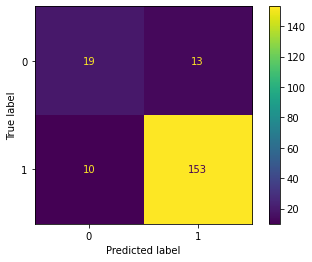

In [15]:
run_model(model, X_train, y_train, X_test, y_test)

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
log_modelo = LogisticRegression(max_iter=10000)

In [18]:
param_grid = {"penalty":["l1","l2","elasticnet"],
             "C":[0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.5,0.99,1],
             "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             "multi_class":['ovr', 'multinomial'],
             "l1_ratio":[0.001,0.01,0.1,0.5,0.99,1]}

In [19]:
grid_modelo = GridSearchCV(log_modelo, param_grid=param_grid)

In [20]:
grid_modelo.fit(X_train, y_train)

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise Valu

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueEr

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anacond

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise Valu

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueEr

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anacond

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise Valu

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise Valu

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise ValueError("Solver %s does not support "
ValueError: Solver liblinear does not support a multinomial backend.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise Valu

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1348, in fit
    multi_class = _check_multi_class(self.multi_class, solver,
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 472, in _check_multi_class
    raise Valu

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueEr

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueEr

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueEr

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-pa

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\site-pa

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call l

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Ambrose Mwas\Anaconda3\lib\s

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\U

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5,
                               0.99, 1],
                         'l1_ratio': [0.001, 0.01, 0.1, 0.5, 0.99, 1],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [21]:
grid_modelo.best_estimator_

LogisticRegression(C=0.2, l1_ratio=0.001, max_iter=10000, multi_class='ovr',
                   penalty='l1', solver='saga')

In [22]:
model = LogisticRegression(C=0.2, l1_ratio=0.001, max_iter=10000, multi_class='ovr',penalty='l1', solver='saga')

C:\Users\Ambrose Mwas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "


              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.95      0.97      0.96       163

    accuracy                           0.93       195
   macro avg       0.89      0.86      0.87       195
weighted avg       0.93      0.93      0.93       195





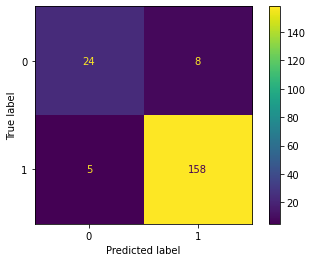

In [23]:
run_model(model, X_train, y_train, X_test, y_test)

In [24]:
from sklearn.svm import SVC

In [25]:
svc = SVC(class_weight="balanced")

In [26]:
param_grid_svc = {"C":[0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.5,0.99,1],
                 "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
                 "degree":[2,3,4,5,6,7,8,9,10],
                 "gamma":["scale","auto"]}

In [27]:
svc_grid_modelo = GridSearchCV(svc,param_grid_svc)

In [28]:
svc_grid_modelo.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5,
                               0.99, 1],
                         'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [29]:
svc_grid_modelo.best_estimator_

SVC(C=0.99, class_weight='balanced', degree=2, kernel='linear')

In [30]:
model = SVC(C=0.2, class_weight='balanced', degree=2, kernel='linear')

              precision    recall  f1-score   support

           0       0.59      0.69      0.64        32
           1       0.94      0.91      0.92       163

    accuracy                           0.87       195
   macro avg       0.77      0.80      0.78       195
weighted avg       0.88      0.87      0.88       195





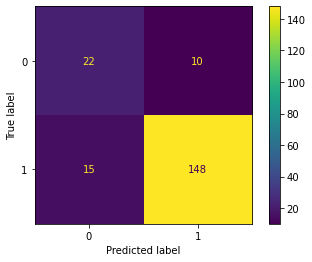

In [31]:
run_model(model, X_train, y_train, X_test, y_test)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        32
           1       0.93      0.93      0.93       163

    accuracy                           0.89       195
   macro avg       0.79      0.79      0.79       195
weighted avg       0.89      0.89      0.89       195





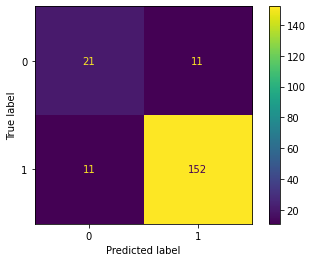

In [34]:
run_model(model, X_train, y_train, X_test, y_test)

In [35]:
model.feature_importances_

array([2.09655223e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.38372447e-02,
       1.24789717e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.30620746e-02,
       2.30381015e-02, 0.00000000e+00, 1.38389919e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.84869041e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.66046937e-02,
       0.00000000e+00, 2.30620746e-02, 3.38104623e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.30620746e-02, 0.00000000e+00,
       2.30620746e-02, 0.00000000e+00, 0.00000000e+00, 3.26002478e-02,
      

In [36]:
Imp_feat_DT = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importances"])

In [37]:
Imp_feat_DT

,Feature Importances
school_MS,0.020966
sex_M,0.000000
address_U,0.000000
famsize_LE3,0.000000
Pstatus_T,0.000000
...,...
health_5,0.026906
age,0.001478
absences,0.033958
G1,0.021341


In [38]:
Imp_feat_DT[Imp_feat_DT["Feature Importances"] > 0.01].sort_values("Feature Importances")

,Feature Importances
Fjob_teacher,0.012479
Fjob_services,0.013837
nursery_yes,0.013839
Dalc_4,0.016279
famrel_2,0.016605
school_MS,0.020966
G1,0.021341
paid_yes,0.023038
famsup_yes,0.023062
famrel_4,0.023062


<AxesSubplot:>

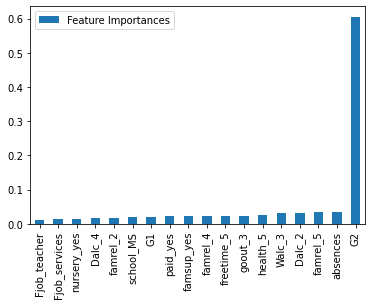

In [39]:
Imp_feat_DT[Imp_feat_DT["Feature Importances"] > 0.01].sort_values("Feature Importances").plot(kind="bar")

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.79      0.59      0.68        32
           1       0.92      0.97      0.95       163

    accuracy                           0.91       195
   macro avg       0.86      0.78      0.81       195
weighted avg       0.90      0.91      0.90       195



              precision    recall  f1-score   support

           0       0.88      0.66      0.75        32
           1       0.94      0.98      0.96       163

    accuracy                           0.93       195
   macro avg       0.91      0.82      0.85       195
weighted avg       0.93      0.93      0.92       195



              precision    recall  f1-score   support

           0       0.91      0.62      0.74        32
           1       0.93      0.99      0.96       163

    accuracy                           0.93       195
   macro avg       0.92      0.81      0.85       195
weighted avg       0.93      0.93      0.92       195



             

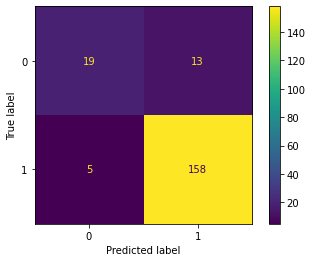

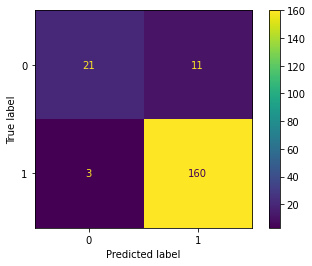

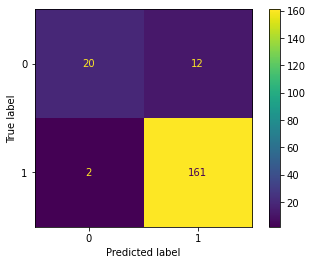

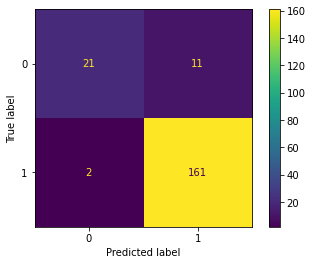

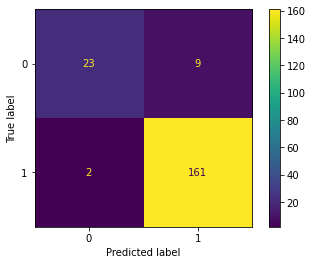

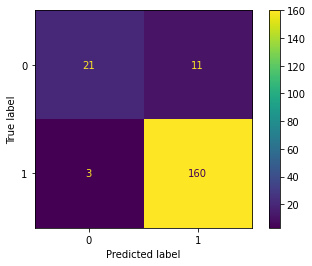

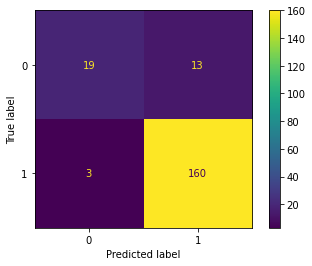

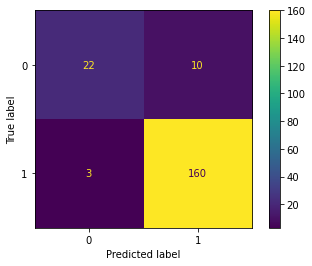

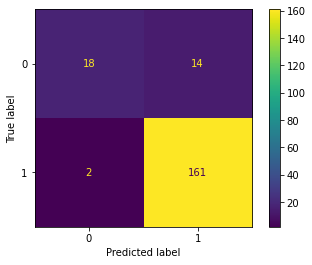

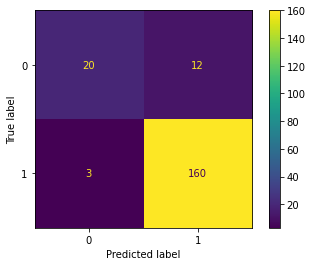

In [42]:
trees = list(range(10,110,10))
for n in trees:
    
    model = RandomForestClassifier(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

In [43]:
model.feature_importances_

array([0.03477299, 0.00886604, 0.01110993, 0.00802416, 0.00511219,
       0.00425622, 0.00804833, 0.0030531 , 0.00170709, 0.00107304,
       0.01017399, 0.00540372, 0.00095781, 0.00587628, 0.00859529,
       0.00553955, 0.00755823, 0.00247081, 0.00448385, 0.00913131,
       0.00467208, 0.01028646, 0.00701011, 0.02313291, 0.01072881,
       0.00929654, 0.01671735, 0.00820954, 0.00519522, 0.00372992,
       0.01220444, 0.00925288, 0.00729595, 0.00420275, 0.00733724,
       0.00747547, 0.00146717, 0.00877394, 0.0056364 , 0.0012416 ,
       0.02491737, 0.00824167, 0.01108064, 0.00383963, 0.00416637,
       0.00844966, 0.00799012, 0.00355549, 0.0082986 , 0.00615907,
       0.01136517, 0.00404395, 0.00775466, 0.00552495, 0.00986539,
       0.0093765 , 0.00636861, 0.00617324, 0.00080989, 0.00661505,
       0.00846755, 0.01013488, 0.00278012, 0.00562628, 0.00537148,
       0.00531829, 0.00695307, 0.02303759, 0.02755194, 0.17758287,
       0.26249922])

In [44]:
Imp_feat_RF = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importances"])

In [45]:
Imp_feat_RF

,Feature Importances
school_MS,0.034773
sex_M,0.008866
address_U,0.011110
famsize_LE3,0.008024
Pstatus_T,0.005112
...,...
health_5,0.006953
age,0.023038
absences,0.027552
G1,0.177583


In [46]:
Imp_feat_RF[Imp_feat_RF["Feature Importances"] > 0.01].sort_values("Feature Importances")

,Feature Importances
Walc_4,0.010135
Fjob_other,0.010174
activities_yes,0.010286
internet_yes,0.010729
failures_3,0.011081
address_U,0.011110
freetime_5,0.011365
Fedu_1,0.012204
Medu_1,0.016717
age,0.023038


<AxesSubplot:>

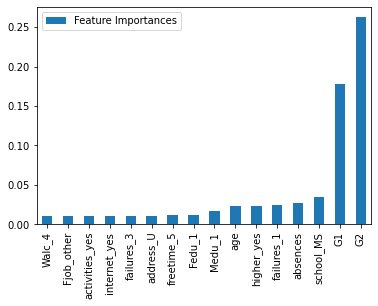

In [47]:
Imp_feat_RF[Imp_feat_RF["Feature Importances"] > 0.01].sort_values("Feature Importances").plot(kind="bar")

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
model = GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.94      0.98      0.96       163

    accuracy                           0.93       195
   macro avg       0.89      0.83      0.86       195
weighted avg       0.93      0.93      0.93       195





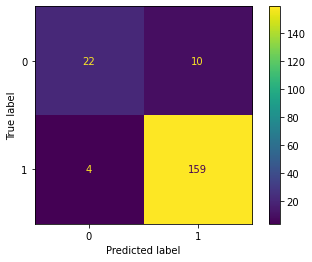

In [50]:
run_model(model, X_train, y_train, X_test, y_test)

In [51]:
model.feature_importances_

array([3.56049123e-03, 1.15186701e-03, 2.09950604e-04, 7.20484115e-04,
       0.00000000e+00, 2.48420953e-04, 3.84094531e-03, 3.53982962e-03,
       0.00000000e+00, 5.83585125e-04, 9.21229569e-03, 4.38562255e-05,
       4.14559235e-03, 0.00000000e+00, 6.10016583e-05, 5.15315704e-03,
       3.16533332e-03, 0.00000000e+00, 3.01219035e-03, 3.60185639e-05,
       2.13809349e-02, 7.21389137e-05, 1.30689307e-02, 4.60165202e-03,
       1.08272597e-03, 8.73434746e-04, 2.43008135e-03, 6.12512769e-04,
       0.00000000e+00, 4.95370411e-05, 2.68061161e-03, 3.31442438e-03,
       3.53747856e-03, 6.12383900e-03, 8.39699018e-04, 4.77767135e-04,
       2.93600005e-04, 4.54422949e-05, 0.00000000e+00, 0.00000000e+00,
       1.26530243e-02, 5.20211385e-03, 1.06187039e-02, 8.43506658e-03,
       0.00000000e+00, 4.79043675e-05, 2.33187528e-02, 1.28671547e-03,
       4.72521808e-04, 3.14872279e-03, 5.06656259e-03, 9.77722268e-05,
       2.87693106e-04, 0.00000000e+00, 9.69288843e-03, 1.35610919e-02,
      

In [52]:
Imp_feat_GB = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importances"])

In [53]:
Imp_feat_GB

,Feature Importances
school_MS,0.003560
sex_M,0.001152
address_U,0.000210
famsize_LE3,0.000720
Pstatus_T,0.000000
...,...
health_5,0.002632
age,0.025971
absences,0.019973
G1,0.102810


In [54]:
Imp_feat_GB[Imp_feat_GB["Feature Importances"] > 0.01].sort_values("Feature Importances")

,Feature Importances
failures_3,0.010619
failures_1,0.012653
nursery_yes,0.013069
Dalc_2,0.013561
absences,0.019973
paid_yes,0.021381
famrel_5,0.023319
age,0.025971
G1,0.102810
G2,0.635041


<AxesSubplot:>

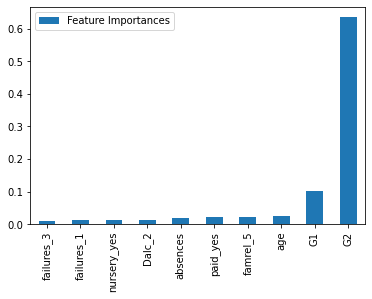

In [55]:
Imp_feat_GB[Imp_feat_GB["Feature Importances"] > 0.01].sort_values("Feature Importances").plot(kind="bar")

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
model = AdaBoostClassifier()

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.96      0.96      0.96       163

    accuracy                           0.93       195
   macro avg       0.88      0.87      0.88       195
weighted avg       0.93      0.93      0.93       195





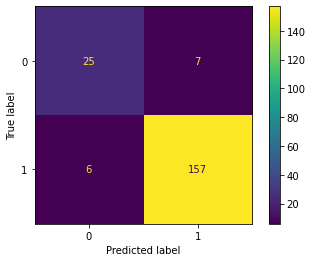

In [58]:
run_model(model,X_train,y_train,X_test,y_test)

In [59]:
model.feature_importances_

array([0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02,
       0.  , 0.02, 0.  , 0.  , 0.02, 0.  , 0.  , 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  ,
       0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02,
       0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.  , 0.02, 0.02, 0.  , 0.02,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.02, 0.  , 0.02, 0.02, 0.  ,
       0.02, 0.06, 0.08, 0.08, 0.24])

In [60]:
Imp_feat_AB = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importances"])

In [61]:
Imp_feat_AB

,Feature Importances
school_MS,0.02
sex_M,0.00
address_U,0.00
famsize_LE3,0.00
Pstatus_T,0.00
...,...
health_5,0.02
age,0.06
absences,0.08
G1,0.08


In [65]:
Imp_feat_AB[Imp_feat_AB["Feature Importances"] > 0.02].sort_values("Feature Importances")

,Feature Importances
freetime_4,0.04
Fedu_2,0.06
age,0.06
absences,0.08
G1,0.08
G2,0.24


<AxesSubplot:>

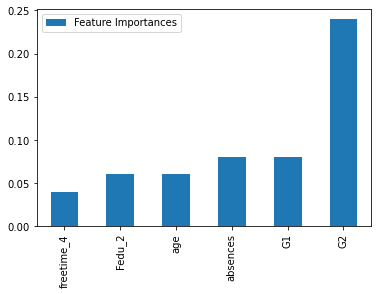

In [66]:
Imp_feat_AB[Imp_feat_AB["Feature Importances"] > 0.02].sort_values("Feature Importances").plot(kind="bar")